# Data Cleaning Earphone Product

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv(r'earphone_toped.csv')
df.head(3)

,Unnamed: 0,title,price,location,provider,discount,total_review,url
0,0,UGREEN 40816 TEMPAT EARPHONE STORAGE CASE CHAR...,Rp38.900,Jakarta Utara,NaN,NaN,(67),https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
1,1,Havit Openbuds 1 Open-Ear Clip Earphones Conne...,Rp351.120,Jakarta Barat,NaN,57%\nRp999.000,(1),https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
2,2,Vention TWS Bluetooth Wireless Headset Earbuds...,Rp155.000,Jakarta Barat,NaN,NaN,(49),https://ta.tokopedia.com/promo/v1/clicks/8a-xg...


In [7]:
# clean discount column
df['discount'] = df.discount.str.split('%\n',expand=True)[0]
df.head(3)

,Unnamed: 0,title,price,location,provider,discount,total_review,url
0,0,UGREEN 40816 TEMPAT EARPHONE STORAGE CASE CHAR...,Rp38.900,Jakarta Utara,NaN,NaN,(67),https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
1,1,Havit Openbuds 1 Open-Ear Clip Earphones Conne...,Rp351.120,Jakarta Barat,NaN,57,(1),https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
2,2,Vention TWS Bluetooth Wireless Headset Earbuds...,Rp155.000,Jakarta Barat,NaN,NaN,(49),https://ta.tokopedia.com/promo/v1/clicks/8a-xg...


In [10]:
# clean total_review column
df['total_review'] = df.total_review.str.replace('[()]','',regex=True)
df.head(2)

,Unnamed: 0,title,price,location,provider,discount,total_review,url
0,0,UGREEN 40816 TEMPAT EARPHONE STORAGE CASE CHAR...,Rp38.900,Jakarta Utara,NaN,NaN,67,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
1,1,Havit Openbuds 1 Open-Ear Clip Earphones Conne...,Rp351.120,Jakarta Barat,NaN,57,1,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...


In [19]:
# clean price column
df['price'] = df.price.str.replace('[a-z-A-Z|/.]','',regex=True).to_numpy('float')
df.head(2)

,Unnamed: 0,title,price,location,provider,discount,total_review,url
0,0,UGREEN 40816 TEMPAT EARPHONE STORAGE CASE CHAR...,38900.0,Jakarta Utara,NaN,NaN,67,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
1,1,Havit Openbuds 1 Open-Ear Clip Earphones Conne...,351120.0,Jakarta Barat,NaN,57,1,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...


In [32]:
# reset index
df.reset_index(drop=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
# fill empty discount with zero
df.discount.fillna(0, inplace=True)

In [39]:
# delete column provider
df.drop('provider', axis=1, inplace=True)

In [40]:
df.head(2)

,title,price,location,discount,total_review,url
0,UGREEN 40816 TEMPAT EARPHONE STORAGE CASE CHAR...,38900.0,Jakarta Utara,0,67,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
1,Havit Openbuds 1 Open-Ear Clip Earphones Conne...,351120.0,Jakarta Barat,57,1,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...


In [43]:
# convert discount percentage to decimal value
df['discount'] = df.discount.apply(lambda x: int(x)/100)
df.head(3)

,title,price,location,discount,total_review,url
0,UGREEN 40816 TEMPAT EARPHONE STORAGE CASE CHAR...,38900.0,Jakarta Utara,0.00,67,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
1,Havit Openbuds 1 Open-Ear Clip Earphones Conne...,351120.0,Jakarta Barat,0.57,1,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
2,Vention TWS Bluetooth Wireless Headset Earbuds...,155000.0,Jakarta Barat,0.00,49,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...


In [44]:
# renaming price to dicounted_price
df.rename(columns={'price': 'discounted_price'}, inplace=True)

In [52]:
# add new column price
df.insert(1, 'price', (df.discount * df.discounted_price) + df.discounted_price)

In [77]:
df.head()

,title,price,discounted_price,location,discount,total_review,url
0,UGREEN 40816 TEMPAT EARPHONE STORAGE CASE CHAR...,38900.0,38900.0,Jakarta Utara,0.00,67,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
1,Havit Openbuds 1 Open-Ear Clip Earphones Conne...,551258.4,351120.0,Jakarta Barat,0.57,1,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
2,Vention TWS Bluetooth Wireless Headset Earbuds...,155000.0,155000.0,Jakarta Barat,0.00,49,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
3,Bose Ultra Open Earbuds Wireless Charging Case...,830000.0,830000.0,Jakarta Utara,0.00,13,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
4,Vention TWS Wireless Bluetooth ENC Earbuds Ear...,98010.0,89100.0,Jakarta Barat,0.10,119,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...


## Find product of Total Review >= 100

In [89]:
# convert total_review to int
df.total_review.dtype

dtype('O')

In [95]:
# change to pandas series first
total_rev = pd.Series(df.total_review)

In [102]:
df['total_review'] = pd.to_numeric(total_rev, errors='coerce').astype('Int32')
df.total_review.dtype

Int32Dtype()

In [109]:
# find all products with review more than 100
good_review = df[df.total_review > 100].sort_values(by='total_review', ascending=False)
good_review.head()

,title,price,discounted_price,location,discount,total_review,url
369,MINISO Earphone Earbud Headphone In-Ear Colorf...,29590.0,26900.0,Bekasi,0.10,19557,https://www.tokopedia.com/miniso-official/mini...
341,JBL T110 Black In Earphones with microphone,153010.0,107000.0,Tangerang,0.43,14395,https://www.tokopedia.com/jbl-official/jbl-t11...
868,THINKPLUS SH1 SPORT BLUETOOTH EARPHONE HEADSET...,137330.0,88600.0,Jakarta Utara,0.55,14121,https://www.tokopedia.com/thinkplus/thinkplus-...
104,Knowledge Zenith KZ EDX Pro Basshead Earphone ...,129314.0,77900.0,Jakarta Barat,0.66,13747,https://www.tokopedia.com/kz-official/knowledg...
135,COPPER EXTRA BASS Series Earphone/Headset/Hand...,51727.0,29900.0,Jakarta Utara,0.73,13372,https://www.tokopedia.com/copperindonesia/copp...


In [120]:
# take one example detail of highest review
idx_good_rev = good_review.total_review.idxmax()
df.loc[idx_good_rev]

title               MINISO Earphone Earbud Headphone In-Ear Colorf...
price                                                         29590.0
discounted_price                                              26900.0
location                                                       Bekasi
discount                                                          0.1
total_review                                                    19557
url                 https://www.tokopedia.com/miniso-official/mini...
Name: 369, dtype: object

In [226]:
# display product with good review and price aboove five hundred thousand rupiah
good_review[good_review.discounted_price > 500000].sort_values(by='total_review', ascending=False).head()

,title,price,discounted_price,location,discount,total_review,url
146,Headset Bluetooth Jete Open Ear 2 Bone Conduct...,"1,249,353","849,900",Jakarta Pusat,0,1280,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
640,Headset Bluetooth Jete Open Ear 2 Bone Conduct...,"1,249,353","849,900",Surabaya,0,1280,https://www.tokopedia.com/gojeteindonesia/head...
70,Sony WF 1000XM5 WF1000XM5 WF-1000XM5 Noise Can...,"3,899,000","3,899,000",Jakarta Utara,0,1212,https://ta.tokopedia.com/promo/v1/clicks/8a-xg...
287,Sony WF 1000XM5 WF1000XM5 WF-1000XM5 Noise Can...,"3,899,000","3,899,000",Jakarta Utara,0,1212,https://www.tokopedia.com/itoms/sony-wf-1000xm...
872,HUAWEI FreeClip Open-Ear TWS Earphone | C-Brid...,"2,900,430","2,479,000",Tangerang,0,846,https://www.tokopedia.com/huawei/huawei-freecl...


## show chat bar
Display what product has good review and price under 500,000

In [217]:
new_df = good_review.groupby('title').mean(numeric_only=True)
new_df = new_df[(new_df.discounted_price < 500000) & (new_df.total_review > 1000)]

In [206]:
# a bit hard to see those numbers, let's display it as float with min 2 decimal
pd.options.display.float_format = '{:,.0f}'.format

In [224]:
new_df.shape

(176, 4)

In [231]:
# we set graph bar for product that has reviews above 1000 and price above 300.000 but below 500.000
new_df = new_df[new_df.discounted_price > 300000]
new_df

,price,discounted_price,discount,total_review
title,,,,
Knowledge Zenith KZ ZS10 Pro - In Ear Earphone - Hybrid 5 Driver,"613,770","499,000",0,"1,550"
MOONDROP CHU II / CHU 2 Dynamic Driver In-Ear Monitor Earphone iem,"395,000","395,000",0,"1,007"
SONY WI-C100 Black Wireless In-ear Sport Earphone / WIC100 / WI C100,"426,420","309,000",0,"1,942"
Samsung AKG Type-C Earphones Original USB-C S21 Ultra S20 Note 20 10,"325,500","310,000",0,"1,314"


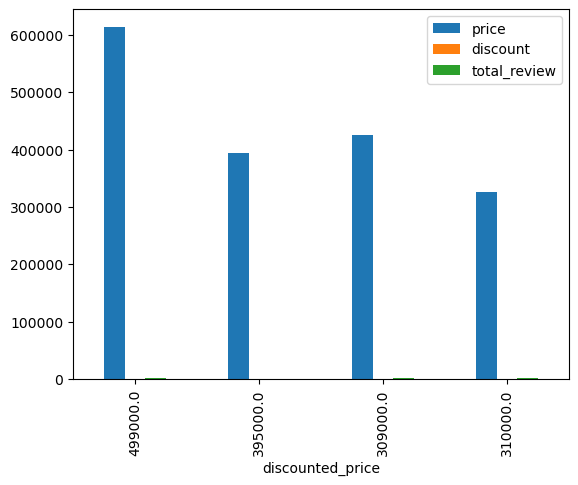

In [236]:
new_df.plot.bar(x='discounted_price');